# Hướng dẫn toàn diện về Histogram trong Matplotlib

## 1. Giới thiệu về Histogram

**Histogram** (biểu đồ tần suất) là một biểu đồ thống kê dùng để hiển thị phân phối tần suất của một tập dữ liệu liên tục. Nó chia dữ liệu thành các khoảng (bins) và đếm số lượng quan sát trong mỗi khoảng.



###  Khi nào sử dụng Histogram
✅ **Nên dùng khi:**
- Dữ liệu liên tục (continuous data)
- Muốn hiểu phân phối của một biến
- bins là khoảng chia dữ liệu
- cột y sẽ dựa vào số dữ liệu đc chia trong khoảng  VD: data = [1, 2, 2, 3, 3, 3, 4, 5, 5, 6]
- Với bins=3, matplotlib tự chia khoảng:
 + Bin 1: 1.0–2.67 → chứa 1, 2, 2 → Y = 3

 + Bin 2: 2.67–4.33 → chứa 3, 3, 3, 4 → Y = 4

 + Bin 3: 4.33–6.0 → chứa 5, 5, 6 → Y = 3
❌ Quá nhiều bins
Mỗi cột có rất ít (thậm chí chỉ 1) giá trị.

Biểu đồ trở nên nhiễu, rối mắt.

Khó nhận ra xu hướng tổng thể vì có quá nhiều chi tiết nhỏ.

👉 Ví dụ: Với dữ liệu 100 điểm, mà chọn 100 bins → gần như mỗi giá trị có 1 cột → không nhìn thấy phân bố.

❌ Quá ít bins
Mỗi bin gom quá nhiều giá trị → mất chi tiết.

Không phát hiện được các đặc điểm quan trọng như các đỉnh, khoảng phân bố, bất đối xứng,...

Có thể dẫn đến hiểu sai phân bố dữ liệu.

### Histogram khác Bar Chart như thế nào?
| Histogram | Bar Chart |
|-----------|-----------|
| Dữ liệu liên tục | Dữ liệu rời rạc/categorical |
| Các cột liền kề nhau | Các cột có khoảng cách |
| Trục X là số | Trục X là category |
| Hiển thị phân phối | So sánh giá trị |

## 2. Tại sao Histogram quan trọng?

### 2.1 Các tác dụng chính
- **Hiểu phân phối dữ liệu**: Normal, skewed, bimodal, uniform
- **Phát hiện outliers**: Giá trị bất thường ở đuôi phân phối
- **Kiểm tra giả định**: Nhiều thuật toán ML yêu cầu dữ liệu normal
- **So sánh datasets**: Overlay nhiều histogram
- **Xác định ngưỡng**: Threshold cho classification
- **Quality control**: Kiểm tra sản phẩm có đạt tiêu chuẩn



## 3. Cú pháp cơ bản

```python
import matplotlib.pyplot as plt
import numpy as np

# Cú pháp đơn giản
plt.hist(data)

# Cú pháp đầy đủ
plt.hist(data, bins=10, range=None, density=False, weights=None,
         cumulative=False, bottom=None, histtype='bar', align='mid',
         orientation='vertical', rwidth=None, log=False, color=None,
         label=None, alpha=None, edgecolor=None, linewidth=None)
```

## 4. Các thuộc tính chính

### 4.1 Thuộc tính dữ liệu cơ bản
| Thuộc tính | Mô tả | Giá trị | Ví dụ |
|------------|-------|---------|-------|
| `data` | Dữ liệu đầu vào (bắt buộc) | Array-like | `[1,2,3,4,5]` |
| `bins` | Số lượng hoặc vị trí bins | Int hoặc array | `bins=20`, `bins=[0,5,10,15]` |
| `range` | Phạm vi dữ liệu | Tuple | `range=(0, 100)` |

### 4.2 Thuộc tính hiển thị
| Thuộc tính | Mô tả | Giá trị | Ví dụ |
|------------|-------|---------|-------|
| `density` | Normalize thành density | Boolean | `density=True` |
| `cumulative` | Histogram tích lũy | Boolean | `cumulative=True` |
| `histtype` | Kiểu histogram | String | `'bar'`, `'step'`, `'stepfilled'` |
| `orientation` | Hướng hiển thị | String | `'vertical'`, `'horizontal'` |

### 4.3 Thuộc tính thẩm mỹ
| Thuộc tính | Mô tả | Giá trị | Ví dụ |
|------------|-------|---------|-------|
| `color` | Màu sắc | Color | `'blue'`, `'#FF0000'` |
| `alpha` | Độ trong suốt | 0.0-1.0 | `alpha=0.7` |
| `edgecolor` | Màu viền | Color | `'black'`, `'white'` |
| `linewidth` | Độ dày viền | Float | `linewidth=1.5` |
| `rwidth` | Độ rộng tương đối của bars | 0.0-1.0 | `rwidth=0.8` |

## 5. Các loại Histogram

### 5.1 Basic Histogram
```python
# Histogram cơ bản
plt.hist(data, bins=30, alpha=0.7, color='blue')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.title('Phân phối dữ liệu')
```

### 5.2 Density Histogram 
```python
# Histogram density (diện tích = 1)
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.ylabel('Density')
```

### 5.3 Cumulative Histogram
```python
# Histogram tích lũy
plt.hist(data, bins=30, cumulative=True, alpha=0.7)
plt.ylabel('Cumulative Frequency')
```

### 5.4 Stepped Histogram
```python
# Histogram dạng step
plt.hist(data, bins=30, histtype='step', linewidth=2)
plt.hist(data, bins=30, histtype='stepfilled', alpha=0.5)
```

### 5.5 Horizontal Histogram
```python
# Histogram ngang
plt.hist(data, bins=30, orientation='horizontal', alpha=0.7)
plt.xlabel('Tần suất')
plt.ylabel('Giá trị')
```

## 6. Lựa chọn số lượng Bins

### 6.1 Các quy tắc phổ biến
```python
import numpy as np

n = len(data)  # Số lượng data points

# Sturges' Rule
bins_sturges = int(np.ceil(np.log2(n) + 1))

# Square Root Rule  
bins_sqrt = int(np.ceil(np.sqrt(n)))

# Rice Rule
bins_rice = int(np.ceil(2 * n**(1/3)))

# Freedman-Diaconis Rule
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
bin_width = 2 * iqr / (n**(1/3))
bins_fd = int(np.ceil((data.max() - data.min()) / bin_width))
```

### 6.2 Hướng dẫn thực tế
| Số lượng dữ liệu | Bins đề xuất | Lý do |
|------------------|--------------|-------|
| < 50 | 5-10 | Tránh noise |
| 50-200 | 10-20 | Cân bằng detail vs noise |
| 200-1000 | 20-50 | Hiển thị pattern tốt |
| > 1000 | 50-100 | Chi tiết cao |



## 12. Các lỗi thường gặp

### 12.1 Quá nhiều hoặc quá ít bins
**Vấn đề:**
- Quá ít bins: Mất thông tin, không thấy pattern
- Quá nhiều bins: Noisy, khó interpret

**Giải pháp:**
- Thử nhiều giá trị bins
- Sử dụng công thức Sturges hoặc Freedman-Diaconis

### 12.2 Không normalize khi so sánh
**Vấn đề:** So sánh datasets có kích thước khác nhau
**Giải pháp:** Sử dụng `density=True`

### 12.3 Bỏ qua outliers
**Vấn đề:** Outliers làm méo histogram
**Giải pháp:** 
- Xử lý outliers trước
- Hoặc plot riêng outliers

### 12.4 Không thêm labels và title
**Vấn đề:** Khó hiểu biểu đồ
**Giải pháp:** Luôn thêm xlabel, ylabel, title

## 15. Tóm tắt



❌ **Không nên dùng khi:**
- Dữ liệu categorical (dùng bar chart)
- Dữ liệu time series (dùng line plot)
- Muốn thấy mối quan hệ giữa 2 biến (dùng scatter plot)
- Dữ liệu quá ít (<20 điểm)

### 15.2 Checklist cho Histogram tốt
- [ ] Chọn số bins phù hợp
- [ ] Thêm xlabel, ylabel, title có ý nghĩa
- [ ] Xử lý outliers nếu cần
- [ ] Thêm thống kê quan trọng (mean, median)
- [ ] Sử dụng colors và alpha hợp lý
- [ ] Thêm grid nhẹ để dễ đọc
- [ ] Normalize nếu so sánh nhiều datasets



In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

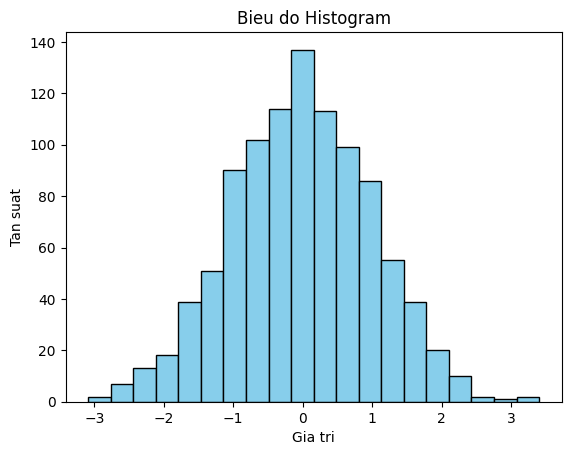

In [5]:
data = np.random.randn(1000)

plt.hist(
    data,
    bins = 20,
    color = 'skyblue',
    edgecolor = 'black'
)

plt.title("Bieu do Histogram")
plt.xlabel("Gia tri")
plt.ylabel('Tan suat')
plt.show()          

In [12]:
low_score = np.random.randint(0,41,140)
hig_score = np.random.randint(41,101, 140)
score = np.concatenate((low_score, hig_score))
score

array([ 16,  14,  18,  26,  37,   8,  39,  22,  38,  22,  28,   1,  29,
        17,  16,  26,   1,  21,  39,  35,   5,  15,   2,   5,   3,  18,
         2,  32,  13,  26,   2,  21,  25,   4,  20,  19,  18,   1,  28,
        25,  39,  21,   3,   5,  11,   7,  37,  17,  24,  12,  18,   2,
        21,  30,  29,  29,  33,  31,  23,  25,   9,  20,  36,   9,  17,
        38,  37,  14,  39,  38,   5,  15,  19,  32,  13,   6,  31,  16,
        37,  24,  14,   0,  33,   9,  28,  23,  13,  39,  34,  39,  30,
        34,   1,  37,  35,  16,  22,   5,   3,  23,  28,   1,  15,  14,
        31,  28,  12,   0,  38,  37,  38,  38,  35,   0,   9,   1,  12,
         4,  38,   3,  30,  37,  40,   7,  23,  21,  12,  18,  24,  39,
        37,  39,  11,   7,  22,  33,   4,  20,  25,   8,  94,  97,  82,
        88,  83,  68,  43,  56,  50,  85,  55,  58,  72,  59,  56,  54,
        55,  47,  46,  80,  96,  57,  75,  91,  75, 100,  83,  65,  63,
        88,  76,  59,  50,  71,  46,  75,  50,  73,  77,  74,  5

In [18]:
df = pd.DataFrame({'score': score})
df

,score
0,16
1,14
2,18
3,26
4,37
...,...
275,45
276,46
277,91
278,89


**Median - Trung vị**:  Điểm chính giữa của dữ liệu. Nếu dữ liệu lẻ thì sẽ là điểm chính giữa, còn dữ liệu chẵn thì sẽ là trung bình cộng của 2 giá trị chính giữa

**Std - Độ lệch chuẩn**: đo mức độ phân tán của dữ liệu quanh giá trị trung bình
Nếu **std** nhỏ, các giá trị gần trung bình → dữ liệu ổn định.

Nếu **std** lớn, các giá trị rải rác xa trung bình → dữ liệu biến động cao.

(0.0, 50.0)

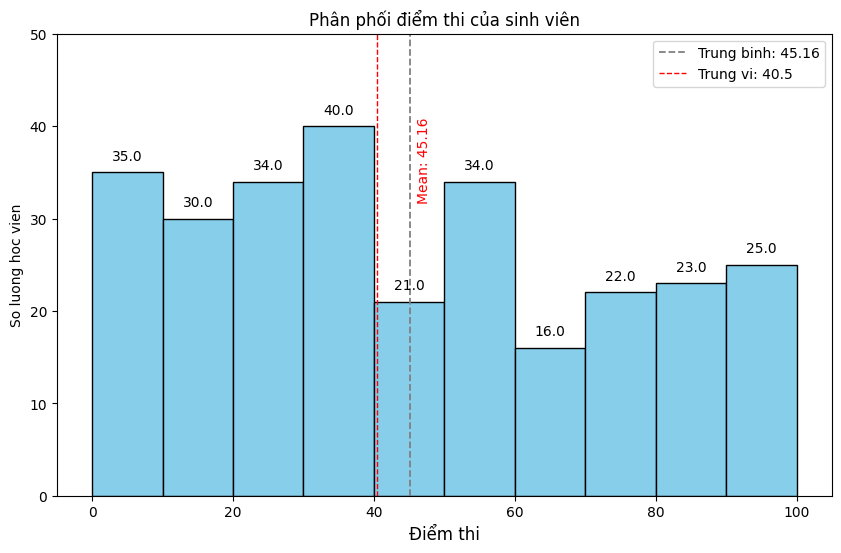

In [126]:
mean = df['score'].mean().round(2)
median = df['score'].median() 
std = df['score'].std().round(2)

plt.figure(figsize=(10,6))
plt.axvline(mean, color = 'grey', linestyle = '--', linewidth = 1.3, label = f"Trung binh: {mean}")
plt.axvline(median , color = 'r', linestyle = '--', linewidth = 1, label = f'Trung vi: {median}')
# plt.axvline(std, color = 'b', linestyle = '--', linewidth = 1, label = f'Do lệch chuẩn: {std}')

n, bins, patches = plt.hist(df['score'], bins = 'auto', color= 'skyblue', edgecolor = 'black')

plt.text(mean +1  , max(n) * 0.8, f'Mean: {mean}', fontsize = 10, color = 'red',  rotation = 90)

for i in range(len(bins) -1):
    plt.text(bins[i] + 5, n[i] + 1 , str(n[i]), ha = 'center', va = 'bottom')

plt.title("Phân phối điểm thi của sinh viên")
plt.xlabel("Điểm thi", fontsize = 12)
plt.legend()
plt.ylabel("So luong hoc vien")
plt.ylim(0,50)

In [134]:
n

array([35., 30., 34., 40., 21., 34., 16., 22., 23., 25.])

In [112]:
bins[1]

np.float64(10.0)

(0.0, 50.0)

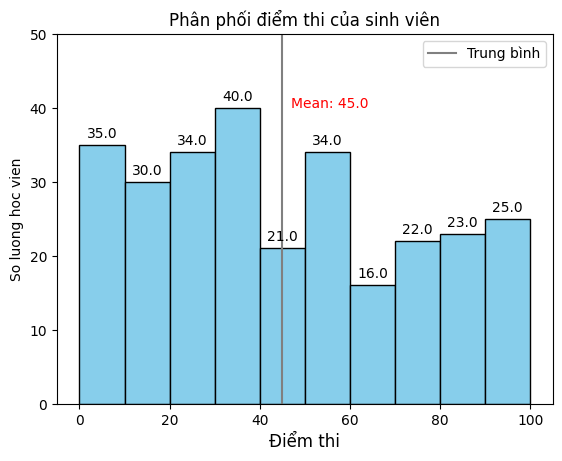

In [162]:
mean = df['score'].mean().round()

plt.axvline(x = mean, color = 'gray', label = f'Trung bình')
plt.text(mean + 2, max(n), f'Mean: {mean}', color = 'r')
n, bins, patches = plt.hist(df['score'], bins = 'auto', edgecolor = 'black', color = 'skyblue')


for i in range(len(bins) -1):
    plt.text((bins[i+1] + bins[i])/2, n[i] + 1, str(n[i]) , ha = 'center')


plt.title("Phân phối điểm thi của sinh viên")
plt.xlabel("Điểm thi", fontsize = 12)
plt.legend()
plt.ylabel("So luong hoc vien")
plt.ylim(0,50)